# Attempt at numericals without additional Cleaning or Engineering. Outliers back in #

In [29]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [30]:
# read in csv
df = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
pd.options.display.max_columns = 999
df = df.reindex(sorted(df.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)

df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


In [31]:
df.shape

(2051, 81)

In [32]:
#select only columns that are num, i.e. not 'object', set equal to variable, but why index?
num_columns = df.dtypes[df.dtypes != 'object'].index
# select all null, set equal to variable
is_nulls = df.isnull().sum()
# selsct all not null, set equal to variable
not_null_columns = is_nulls[is_nulls==0].index
selected = df[not_null_columns & num_columns]
selected

/var/folders/nf/hqtqkkg54s75vy60jfg0jcp00000gn/T/ipykernel_66925/3894218924.py:7: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  selected = df[not_null_columns & num_columns]


,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Enclosed Porch,Fireplaces,Full Bath,Gr Liv Area,Half Bath,Id,Kitchen AbvGr,Lot Area,Low Qual Fin SF,MS SubClass,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,SalePrice,Screen Porch,TotRms AbvGrd,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,3,0,0,2,1479,1,109,1,13517,0,60,0,3,44,8,6,533352170,0,130500,0,6,0,1976,2005,2010
1,913,1209,0,4,0,1,2,2122,1,544,1,11492,0,60,0,4,74,5,7,531379050,0,220000,0,8,0,1996,1997,2009
2,1057,0,0,3,0,0,1,1057,0,153,1,7922,0,20,0,1,52,7,5,535304180,0,109000,0,5,0,1953,2007,2010
3,744,700,0,3,0,0,2,1444,1,318,1,9802,0,60,0,4,0,5,5,916386060,0,174000,0,7,100,2006,2007,2010
4,831,614,0,3,0,0,2,1445,0,255,1,14235,0,50,0,3,59,8,6,906425045,0,138500,0,6,0,1900,1993,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1728,0,0,3,0,1,2,1728,0,1587,1,11449,0,20,0,1,276,5,8,921126030,0,298751,0,7,0,2007,2007,2008
2047,861,0,0,1,0,0,1,861,0,785,1,12342,0,30,0,3,0,5,4,905377130,0,82500,0,4,158,1940,1950,2009
2048,1172,741,0,3,0,1,1,1913,1,916,1,7558,0,50,0,3,0,6,6,909253010,0,177000,0,9,0,1928,1950,2009
2049,1200,0,0,3,140,2,1,1200,0,639,1,10400,0,20,0,11,189,5,4,535179160,0,144000,0,6,0,1956,1956,2009


In [33]:
#set X, y
#selected is dataframe, remove 'SalePrice'
X = selected.drop(columns='SalePrice')
features = X.columns
y = df['SalePrice']
#instantiate
lr = LinearRegression()

In [34]:
#baseline cross val to see if it makes sense to continue or adjust
cross_val_score(lr,X,y).mean()
#"79% of variance in y is explained in the model" not a bad score, I'll proceed

0.791606939019008

In [35]:
# train test split 'val' is stand-in for test because test_dataset exists also
#random_state @ 33, train/test split@ 70/30

X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=33)

# fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
#train score
lr.score(X_train, y_train)

0.8422740485595444

In [37]:
#test score
lr.score(X_val, y_val)

0.7131748932498546

In [38]:
#this was a test, if doing in earnest, would have stopped above
cross_val_score(lr,X_train,y_train).mean()

0.8094762996224087

 # ASSESS:
 - train score = 84.2
 - test score = 71.3
 - cross_val score = 80.9
 looks like a little? high on variance, low on bias 

In [39]:
# make predictions
pred = lr.predict(X)
pred

array([167994.69598389, 233620.11343946, 123266.78241879, ...,
       173826.80211171, 119774.48214666, 225164.95870329])

In [40]:
#residuals 
residuals = y-pred
residuals

0      -37494.695984
1      -13620.113439
2      -14266.782419
3       19568.156483
4        6307.260366
            ...     
2046    31056.286123
2047    -8978.823953
2048     3173.197888
2049    24225.517853
2050   -36164.958703
Name: SalePrice, Length: 2051, dtype: float64

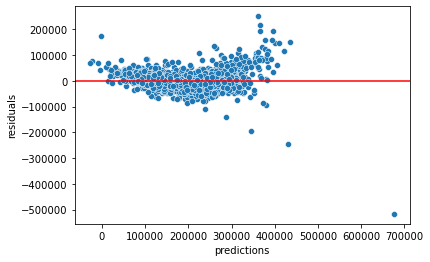

In [41]:
plt.axhline(y=0, color='r')
sns.scatterplot(x=pred, y=residuals)
('Residual Plot to Show error - Epsilon')
plt.xlabel('predictions')
plt.ylabel('residuals');

# Not a very good model:high variance among scores, the #

-570.663359725342

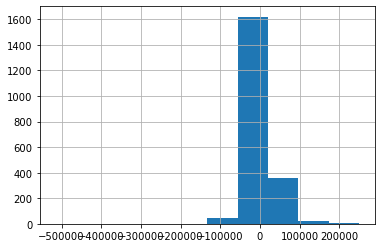

In [42]:
residuals.hist();
residuals.mean()

In [43]:
residuals.sort_values()

960    -516778.294403
1885   -246166.212050
125    -195051.922027
348    -139902.414870
1695   -109668.698200
            ...      
304     174383.363009
151     192003.260280
1964    194912.579839
1796    216192.048911
1671    250333.798446
Name: SalePrice, Length: 2051, dtype: float64

In [44]:
#df_test.shape

#df_test[features]

#make preds on test
test_preds = lr.predict(df_test[features])
#test_preds.shape

#create target column 'SalePrice' in df_test
df_test['SalePrice'] = test_preds

#create df for submission with only Id and SalePrice
submission = df_test[['Id', 'SalePrice']]

submission.set_index('Id', inplace=True)
submission.head()

,SalePrice
Id,
2658,128991.455780
2718,162890.418248
2414,212648.901719
1989,111145.405072
625,185025.423455


In [45]:
#submission.to_csv('../datasets/Kaggle Submissions/570, overfit - .csv')